# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [1]:
# TO BE COMPLETED

#http://https://colab.research.google.com/drive/1EMsQAc9jeIXjZk62y5yMUwDAE-QiaIjL

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [1]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/seonghak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [2]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [3]:
print(X.shape), print(y.shape)

(50000,)
(50000,)


(None, None)

In [6]:
# TO BE COMPLETED
print(f'review : \n{X[18]}, \nsentiment : {y[18]}')


review : 
I remember this film,it was the first film i had watched at the cinema the picture was dark in places i was very nervous it was back in 74/75 my Dad took me my brother & sister to Newbury cinema in Newbury Berkshire England. I recall the tigers and the lots of snow in the film also the appearance of Grizzly Adams actor Dan Haggery i think one of the tigers gets shot and dies. If anyone knows where to find this on DVD etc please let me know.The cinema now has been turned in a fitness club which is a very big shame as the nearest cinema now is 20 miles away, would love to hear from others who have seen this film or any other like it., 
sentiment : positive


In [7]:
'''
PROVIDE YOUR ANSWER BELOW

Index 18 says that the movie itself is not bad, but the movie before it was remade was better.
This means giving a negative evaluation of the film in question and a positive evaluation of the previous film.
In this way, we can see that the movie has not been properly evaluated.


'''


'\nPROVIDE YOUR ANSWER BELOW\n\nIndex 18 says that the movie itself is not bad, but the movie before it was remade was better.\nThis means giving a negative evaluation of the film in question and a positive evaluation of the previous film.\nIn this way, we can see that the movie has not been properly evaluated.\n\n\n'

### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

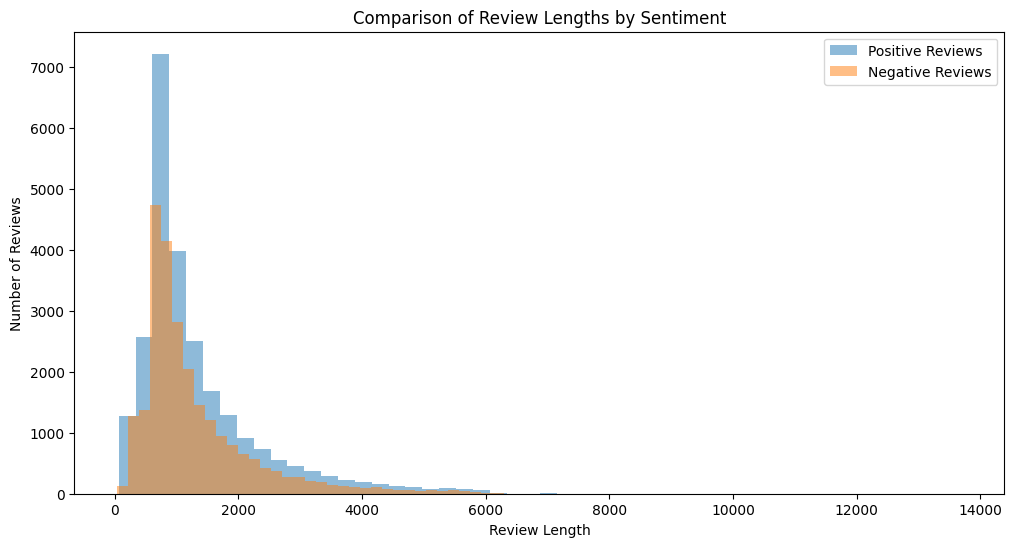

average length : 1309.43102
longest review : 13704
shortest review : 32
the number of positive reviews : 25000
the number of negative reviews : 25000
average length positive : 1324.79768
average length negative : 1294.06436


In [4]:
review_lengths = np.array([len(review) for review in X])

average_length = np.mean(review_lengths)

longest_review = np.max(review_lengths)
shortest_review = np.min(review_lengths)

num_positive_reviews = (y == 'positive').sum()
num_negative_reviews = (y == 'negative').sum()

positive_review_lengths = review_lengths[y == 'positive']
negative_review_lengths = review_lengths[y == 'negative']

avg_length_positive = np.mean(positive_review_lengths)
avg_length_negative = np.mean(negative_review_lengths)

plt.figure(figsize=(12, 6))
plt.hist(positive_review_lengths, alpha=0.5, bins=50, label='Positive Reviews')
plt.hist(negative_review_lengths, alpha=0.5, bins=50, label='Negative Reviews')
plt.legend()
plt.title('Comparison of Review Lengths by Sentiment')
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.show()

average_length, longest_review, shortest_review, num_positive_reviews, num_negative_reviews, avg_length_positive, avg_length_negative
print(f'average length : {average_length}')
print(f'longest review : {longest_review}')
print(f'shortest review : {shortest_review}')
print(f'the number of positive reviews : {num_positive_reviews}')
print(f'the number of negative reviews : {num_negative_reviews}')
print(f'average length positive : {avg_length_positive}')
print(f'average length negative : {avg_length_negative}')



In [5]:
'''
PROVIDE YOUR ANSWER BELOW

General observations :

average length : 1309.43102
longest review : 13704
shortest review : 32
the number of positive reviews : 25000
the number of negative reviews : 25000
average length positive : 1324.79768
average length negative : 1294.06436

Observations positive vs negative:

There is a balance of positive and negative reviews.
We can see that not only the amount of data is the same at 25000, but the avg length is also similar.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nGeneral observations :\n\naverage length : 1309.43102\nlongest review : 13704\nshortest review : 32\nthe number of positive reviews : 25000\nthe number of negative reviews : 25000\naverage length positive : 1324.79768\naverage length negative : 1294.06436\n\nObservations positive vs negative:\n\nThere is a balance of positive and negative reviews.\nWe can see that not only the amount of data is the same at 25000, but the avg length is also similar.\n\n'

### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [6]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                                     if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return data_encoded, np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

Certainly, let's connect each step of the preprocessing directly with the provided helper code:

1. **Clean Text (`preprocess_string`)**:
   - Removes punctuation and special characters to focus on words and numbers, simplifying the text.
   - Removes all spaces (though typically, you'd want to clean whitespace, not remove it entirely).
   - Removes digits to focus on textual information, though this might not always be desired depending on context.

2. **Remove Stopwords and Tokenization (`preprocess_sentence`)**:
   - Converts text to lowercase and splits into words, making the processing uniform and simplifying the text.
   - Removes stopwords to focus on more semantically meaningful words.
   - Applies `preprocess_string` to each word for further cleaning.

3. **Build Vocabulary (`get_stoi`)**:
   - Creates a list of unique words from the processed text.
   - Limits the vocabulary to the 1000 most common words, reducing model complexity and focusing on relevant words.
   - Maps each of these words to a unique integer, facilitating numerical processing by the LSTM.

4. **Encode Reviews and Labels (`tokenize`)**:
   - Converts reviews into sequences of integers using the vocabulary mapping created earlier. This step transforms the text into a format that the LSTM can process.
   - Encodes sentiment labels as binary values, aligning with the binary classification task (positive to 1, negative to 0).

5. **Padding (`padding_`)**:
   - Ensures all sequences have the same length by padding them with zeros. This uniform length is crucial for training LSTMs, as they require fixed-size input tensors.

These preprocessing steps, as defined in the helper code, are essential for preparing the text data for LSTM model training. They systematically reduce the complexity of the raw text, focus the model's learning on the most informative parts of the data, and transform the data into a numerical format that the LSTM can efficiently process.

### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [8]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

stoi = get_stoi(X_train)
X_train_encoded, y_train_encoded = tokenize(X_train, y_train, stoi)
X_valid_encoded, y_valid_encoded = tokenize(X_valid, y_valid, stoi)
X_test_encoded, y_test_encoded = tokenize(X_test, y_test, stoi)

seq_len = 500
X_train_padded = padding_(X_train_encoded,seq_len)
X_valid_padded = padding_(X_valid_encoded,seq_len)
X_test_padded = padding_(X_test_encoded,seq_len)


<built-in method get of Counter object at 0x7f23a842a130>


### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [9]:
class ReviewDataset():
    """Custom Dataset for loading the review text data"""
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]
        return text, label


# Convert the padded training and validation datasets and their labels into PyTorch tensors
train_texts_tensor = torch.tensor(X_train_padded, dtype=torch.long)
train_labels_tensor = torch.tensor(y_train_encoded, dtype=torch.float)
valid_texts_tensor = torch.tensor(X_valid_padded, dtype=torch.long)
valid_labels_tensor = torch.tensor(y_valid_encoded, dtype=torch.float)


# Create instances of the ReviewDataset
train_dataset = ReviewDataset(train_texts_tensor, train_labels_tensor)
valid_dataset = ReviewDataset(valid_texts_tensor, valid_labels_tensor)


batch_size = 16
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=True)

for texts, labels in train_loader:
    print(f'train loader      -- Batch size: {texts.size()}, Labels size: {labels.size()}')
    break  # Only iterate through the first batch for this example

for texts, labels in valid_loader:
    print(f'validation loader -- Batch size: {texts.size()}, Labels size: {labels.size()}')
    break  # Only iterate through the first batch for this example


train loader      -- Batch size: torch.Size([16, 500]), Labels size: torch.Size([16])
validation loader -- Batch size: torch.Size([16, 500]), Labels size: torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [10]:
class SentimentRNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, drop_prob=0.5):
      super(SentimentRNN, self).__init__()
      self.name = 'SentimentRNN'
      self.n_layers = n_layers
      self.hidden_dim = hidden_dim
      self.embedding = nn.Embedding(vocab_size, embedding_dim)
      self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, dropout=drop_prob, batch_first=True)
      self.dropout = nn.Dropout(drop_prob)
      self.fc = nn.Linear(2*hidden_dim, output_dim)
      self.sig = nn.Sigmoid()

    def forward(self, x, hidden):
      batch_size = x.size(0)

      # Embedding and RNN
      x = self.embedding(x)
      out, hidden = self.lstm(x, hidden)

      # Max pooling and average pooling
      out_max = torch.max(out, dim=1)[0]
      out_avg = torch.mean(out, dim=1)
      out = torch.cat([out_max, out_avg], dim=1)

      # Dropout and fully connected layer
      out = self.dropout(out)
      out = self.fc(out)

      # Sigmoid function
      sig_out = self.sig(out)

      return sig_out, hidden


    def init_hidden(self, batch_size):

      weight = next(self.parameters()).data
      if torch.cuda.is_available():
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
      else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                    weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())

      return hidden


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [11]:
def get_accuracy(model, data_loader, device='cpu'):
    model.eval()

    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in data_loader:
          if torch.cuda.is_available():
            inputs, labels = inputs.to(device), labels.to(device)

          outputs, _ = model(inputs, model.init_hidden(inputs.size(0)))
          predicted = outputs.round()

          # Update totals
          total += labels.size(0)
          correct += (predicted == labels.unsqueeze(1)).sum().item()

    return correct / total



### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [42]:
def get_model_name(name, batch_size, learning_rate, epoch, embedding_dim, hidden_dim):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}_embedding{4}_hidden{5}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch,
                                                   embedding_dim,
                                                   hidden_dim)
    return path

In [13]:
import torch.optim as optim

def train(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5, device='cpu', batch_size=16):

  criterion = nn.BCELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)

  # To store metrics
  train_losses, val_losses = [], []
  train_accuracies, val_accuracies = [], []

  folder_name = model.name+'embdding_dim'+str(model.embedding)+'hidden_dim'+str(model.hidden_dim)
  os.makedirs(folder_name, exist_ok=True)

  for epoch in range(num_epochs):
      # Training
      model.train()
      train_loss = 0.0
      for index, data in enumerate(train_loader):
          inputs, labels = data[0].to(device), data[1].to(device)
          hidden = model.init_hidden(inputs.size(0))
          if torch.cuda.is_available():
            hidden = tuple([each.data.cuda() for each in hidden])

          optimizer.zero_grad()
          output, hidden = model(inputs, hidden)
          loss = criterion(output.squeeze(), labels.float())
          loss.backward()
          optimizer.step()
          train_loss += loss.item()

      # Validation
      val_loss = 0.0
      val_accuracy = get_accuracy(model, valid_loader, device)

      model.eval()
      with torch.no_grad():
          for data in valid_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            hidden = model.init_hidden(inputs.size(0))
            if torch.cuda.is_available():
              hidden = tuple([each.data.cuda() for each in hidden])
            output, _ = model(inputs, hidden)
            loss = criterion(output.squeeze(), labels.float())
            val_loss += loss.item()

      # Calculate average losses
      train_losses.append(train_loss / len(train_loader))
      val_losses.append(val_loss / len(valid_loader))

      # Store accuracy
      train_accuracies.append(get_accuracy(model, train_loader, device))
      val_accuracies.append(val_accuracy)

        
      model_path = get_model_name(model.name, batch_size, learning_rate, epoch, model.embedding, model.hidden_dim)
      
      torch.save(model.state_dict(), folder_name+'/'+model_path)
      print(f'Epoch {epoch+1}: Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracies[-1]:.4f}, '
            f'Valid Loss: {val_losses[-1]:.4f}, Valid Acc: {val_accuracies[-1]:.4f}')

  # Plotting
  plt.figure(figsize=(12, 6))
  plt.subplot(1, 2, 1)
  plt.plot(train_losses, label='Training Loss')
  plt.plot(val_losses, label='Validation Loss')
  plt.title('Training & Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(train_accuracies, label='Training Accuracy')
  plt.plot(val_accuracies, label='Validation Accuracy')

  plt.show()


Epoch 1: Train Loss: 0.6932, Train Acc: 0.4999, Valid Loss: 0.6923, Valid Acc: 0.4992
Epoch 2: Train Loss: 0.6915, Train Acc: 0.5923, Valid Loss: 0.6900, Valid Acc: 0.5962
Epoch 3: Train Loss: 0.6819, Train Acc: 0.6678, Valid Loss: 0.6324, Valid Acc: 0.6677
Epoch 4: Train Loss: 0.5697, Train Acc: 0.7359, Valid Loss: 0.5428, Valid Acc: 0.7312
Epoch 5: Train Loss: 0.5276, Train Acc: 0.7569, Valid Loss: 0.5152, Valid Acc: 0.7494


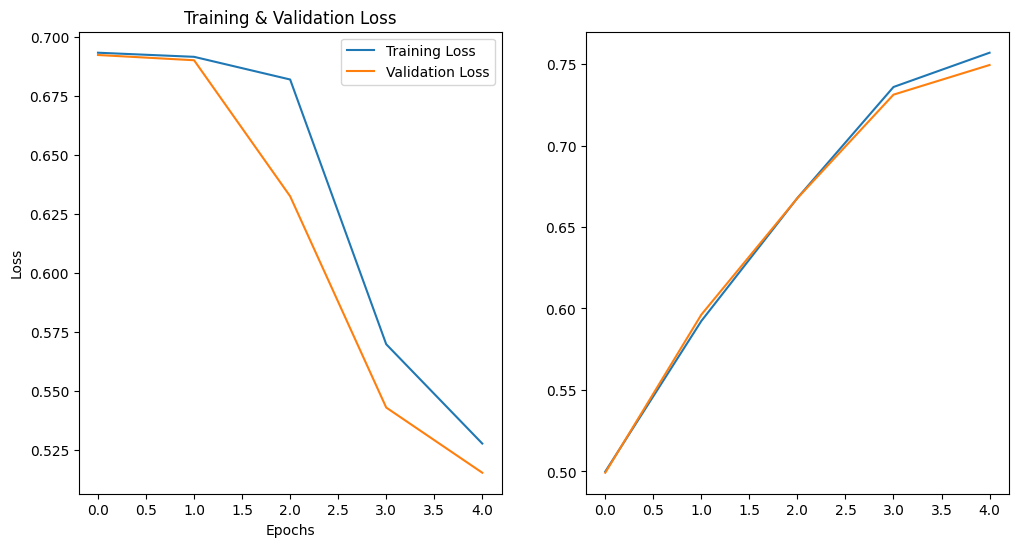

In [37]:
# Parameters for the model
vocab_size = len(stoi) + 1
embedding_dim = 128
hidden_dim = 256
output_dim = 1
n_layers = 2
batch_size = 16
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5, device=device, batch_size=batch_size)

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

Epoch 1: Train Loss: 0.6934, Train Acc: 0.4997, Valid Loss: 0.6923, Valid Acc: 0.4991
Epoch 2: Train Loss: 0.6919, Train Acc: 0.5276, Valid Loss: 0.6905, Valid Acc: 0.5264
Epoch 3: Train Loss: 0.6839, Train Acc: 0.6381, Valid Loss: 0.6497, Valid Acc: 0.6391
Epoch 4: Train Loss: 0.5802, Train Acc: 0.7371, Valid Loss: 0.5389, Valid Acc: 0.7296
Epoch 5: Train Loss: 0.5256, Train Acc: 0.7593, Valid Loss: 0.5118, Valid Acc: 0.7505
Epoch 6: Train Loss: 0.5019, Train Acc: 0.7745, Valid Loss: 0.4927, Valid Acc: 0.7649
Epoch 7: Train Loss: 0.4807, Train Acc: 0.7851, Valid Loss: 0.4764, Valid Acc: 0.7751
Epoch 8: Train Loss: 0.4629, Train Acc: 0.7921, Valid Loss: 0.4643, Valid Acc: 0.7827
Epoch 9: Train Loss: 0.4451, Train Acc: 0.8042, Valid Loss: 0.4457, Valid Acc: 0.7947
Epoch 10: Train Loss: 0.4287, Train Acc: 0.8141, Valid Loss: 0.4337, Valid Acc: 0.8029


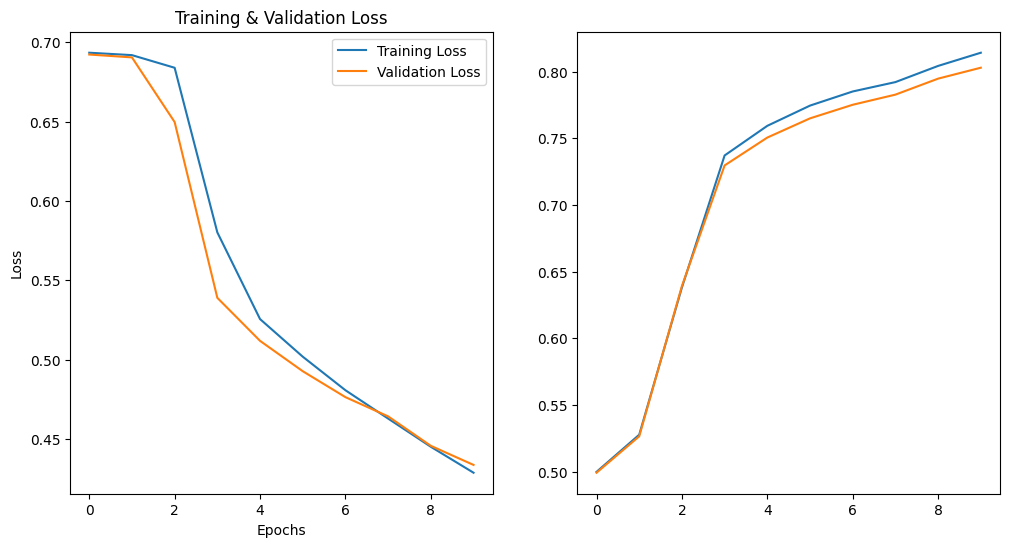

In [47]:
# num_epochs=10
model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device, batch_size=batch_size)

Epoch 1: Train Loss: 0.6935, Train Acc: 0.5245, Valid Loss: 0.6923, Valid Acc: 0.5277
Epoch 2: Train Loss: 0.6920, Train Acc: 0.6622, Valid Loss: 0.6903, Valid Acc: 0.6598
Epoch 3: Train Loss: 0.6872, Train Acc: 0.6243, Valid Loss: 0.6785, Valid Acc: 0.6179
Epoch 4: Train Loss: 0.6000, Train Acc: 0.7473, Valid Loss: 0.5391, Valid Acc: 0.7483
Epoch 5: Train Loss: 0.5116, Train Acc: 0.7799, Valid Loss: 0.4816, Valid Acc: 0.7777
Epoch 6: Train Loss: 0.4695, Train Acc: 0.8011, Valid Loss: 0.4530, Valid Acc: 0.7933
Epoch 7: Train Loss: 0.4417, Train Acc: 0.8156, Valid Loss: 0.4323, Valid Acc: 0.8026
Epoch 8: Train Loss: 0.4201, Train Acc: 0.8255, Valid Loss: 0.4187, Valid Acc: 0.8107
Epoch 9: Train Loss: 0.4019, Train Acc: 0.8319, Valid Loss: 0.4104, Valid Acc: 0.8148
Epoch 10: Train Loss: 0.3890, Train Acc: 0.8396, Valid Loss: 0.3986, Valid Acc: 0.8218


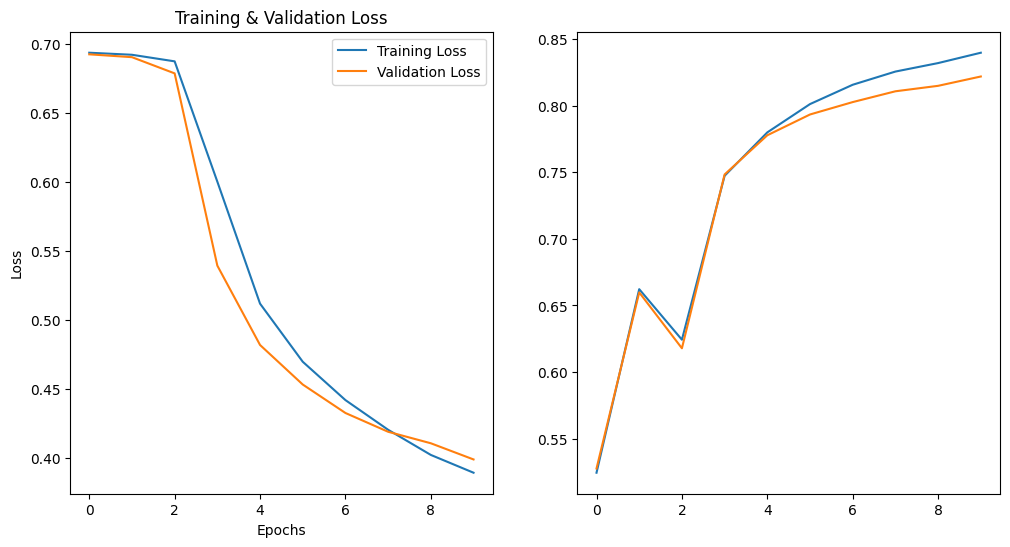

In [48]:
# embedding_dim 256
vocab_size = len(stoi) + 1
embedding_dim = 256
hidden_dim = 256
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device, batch_size=batch_size)



Epoch 1: Train Loss: 0.6926, Train Acc: 0.5696, Valid Loss: 0.6901, Valid Acc: 0.5632
Epoch 2: Train Loss: 0.6193, Train Acc: 0.7590, Valid Loss: 0.5060, Valid Acc: 0.7589
Epoch 3: Train Loss: 0.4820, Train Acc: 0.7916, Valid Loss: 0.4632, Valid Acc: 0.7841
Epoch 4: Train Loss: 0.4412, Train Acc: 0.8109, Valid Loss: 0.4356, Valid Acc: 0.7983
Epoch 5: Train Loss: 0.4123, Train Acc: 0.8273, Valid Loss: 0.4161, Valid Acc: 0.8110
Epoch 6: Train Loss: 0.3890, Train Acc: 0.8408, Valid Loss: 0.3961, Valid Acc: 0.8218
Epoch 7: Train Loss: 0.3694, Train Acc: 0.8501, Valid Loss: 0.3827, Valid Acc: 0.8314
Epoch 8: Train Loss: 0.3524, Train Acc: 0.8601, Valid Loss: 0.3737, Valid Acc: 0.8377
Epoch 9: Train Loss: 0.3385, Train Acc: 0.8667, Valid Loss: 0.3703, Valid Acc: 0.8402
Epoch 10: Train Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457


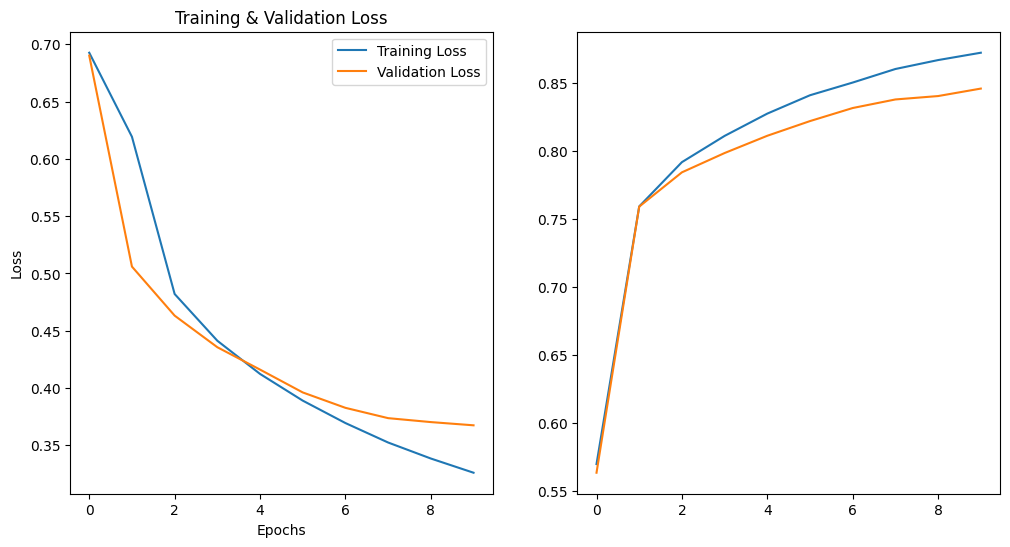

In [49]:
# hidden_dim 512
vocab_size = len(stoi) + 1
embedding_dim = 256
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device, batch_size=batch_size)



Epoch 1: Train Loss: 0.6915, Train Acc: 0.5609, Valid Loss: 0.6858, Valid Acc: 0.5579
Epoch 2: Train Loss: 0.5627, Train Acc: 0.7999, Valid Loss: 0.4468, Valid Acc: 0.7987
Epoch 3: Train Loss: 0.4262, Train Acc: 0.8311, Valid Loss: 0.4019, Valid Acc: 0.8256
Epoch 4: Train Loss: 0.3838, Train Acc: 0.8469, Valid Loss: 0.3796, Valid Acc: 0.8360
Epoch 5: Train Loss: 0.3608, Train Acc: 0.8562, Valid Loss: 0.3708, Valid Acc: 0.8402
Epoch 6: Train Loss: 0.3427, Train Acc: 0.8627, Valid Loss: 0.3635, Valid Acc: 0.8426
Epoch 7: Train Loss: 0.3288, Train Acc: 0.8675, Valid Loss: 0.3593, Valid Acc: 0.8445
Epoch 8: Train Loss: 0.3163, Train Acc: 0.8745, Valid Loss: 0.3537, Valid Acc: 0.8478
Epoch 9: Train Loss: 0.3054, Train Acc: 0.8811, Valid Loss: 0.3508, Valid Acc: 0.8481
Epoch 10: Train Loss: 0.2949, Train Acc: 0.8859, Valid Loss: 0.3496, Valid Acc: 0.8512


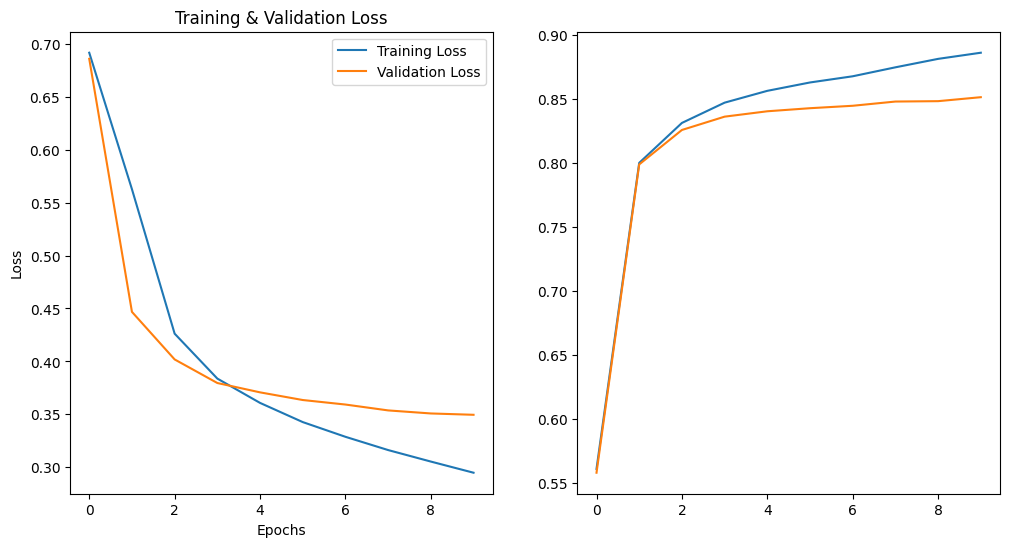

In [50]:
# hidden_dim 512 and embedding_dim 512
vocab_size = len(stoi) + 1
embedding_dim = 512
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device, batch_size=batch_size)



In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

vocab_size = 1001
embedding_dim = 256
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)
train(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)

When embedding dimension=256, hidden dimension=512, num epochs=10, learning_rate=1e-5
Epoch 10: Train Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457, with very little overfitting and high validation acc.
When embedding dim was set too high, overfitting occurred, so setting it to 256, which is not too high, seems to produce the best performance.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n# embedding_dim 256\nvocab_size = len(stoi) + 1\nembedding_dim = 256\nhidden_dim = 256\noutput_dim = 1\nn_layers = 2\ndevice = "cuda" if torch.cuda.is_available() else "cpu"\n\nmodel = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)\ntrain(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5, device=device)\n\nWhen embedding dimension=256, hidden dimension=256, num epochs=10, learning_rate=1e-5\nEpoch 10: Train Loss: 0.3836, Train Acc: 0.8435, Valid Loss: 0.3960, Valid Acc: 0.8273, with very little overfitting and high validation acc.\nWhen embeddinf dim was set too high, overfitting occurred, so setting it to 256, which is not too high, seems to produce the best performance.\n\n\n'

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [14]:
# TO BE COMPLETED
vocab_size = 1001
embedding_dim = 256
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

best_model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

folder_name = best_model.name+'embdding_dim'+str(best_model.embedding)+'hidden_dim'+str(best_model.hidden_dim)
model_path = get_model_name(best_model.name, batch_size, learning_rate=1e-5, epoch=5, embedding_dim=best_model.embedding, hidden_dim=best_model.hidden_dim)
state =torch.load(folder_name+"/"+model_path)
best_model.load_state_dict(state)


test_texts_tensor = torch.tensor(X_test_padded, dtype=torch.long)
test_labels_tensor = torch.tensor(y_test_encoded, dtype=torch.float)

test_dataset = ReviewDataset(test_texts_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

In [15]:
test_acc = get_accuracy(best_model, test_loader,device)
print(test_acc)

0.8192


In [51]:
'''
PROVIDE YOUR ANSWER BELOW

Train Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457, test Acc: 0.8192
Although the accuracy is lower than train or val, you can see that it delivers good performance. 
As expected, I hoped it would come out similar to val acc, but I was able to confirm that it was slightly off.

'''


'\nPROVIDE YOUR ANSWER BELOW\n\nTrain Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457, test Acc: 0.8192\nAlthough the accuracy is lower than train or val, you can see that it delivers good performance. \nAs expected, I hoped it would come out similar to val acc, but I was able to confirm that it was slightly off.\n\n'

### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [98]:
misclassified_positive = []
misclassified_negative = []

i=0
for inputs, labels in test_loader:
  hidden = best_model.init_hidden(inputs.size(0))
  
  if torch.cuda.is_available():
    inputs, labels = inputs.to(device), labels.to(device)
    hidden = tuple([each.data.cuda() for each in hidden])
    
  output,_ = best_model(inputs,hidden)
  pred = torch.round(output.squeeze())
  correct = pred.eq(labels.view_as(pred))
  incorrect_indices = torch.where(correct == False)[0]
  
  for idx in incorrect_indices.tolist():
      true_label = labels[idx].item()
      predicted_label = pred[idx].item()
      review_text = inputs[idx]  
      
      # Collect examples based on true label
      if true_label == 1:  # Assuming '1' is positive
          misclassified_positive.append(review_text)
      else:  # Assuming '0' is negative
          misclassified_negative.append(review_text)
      
      if len(misclassified_positive) >= 5 and len(misclassified_negative) >= 5:
          break
  if len(misclassified_positive) >= 5 and len(misclassified_negative) >= 5:
      break
  
  i += inputs.size(0)  




In [99]:
for text in misclassified_positive:
    print(text)
    

The comic banter between William Powell and Jean Arthur is the highlight of this murder mystery, which has one of the most bizarre and unlikely plots ever. Powell is probably the most suave detective of the 30's, and Arthur has a unique voice which often sounds like a succession of tiny tinkly bells. They are extremely fun to watch, so take the brashness of the plot with a grain of salt and just enjoy seeing it unfold. Eric Blore also has some comic turns as Powell's butler.<br /><br />Powell's contract with MGM included a clause which allowed him to reject being loaned out to another studio, but he wanted to work again with Arthur and he liked the script, so he eagerly accepted the assignment. They had worked together in two 1929 Paramount films, The Canary Murder Case and The Greene Murder Case, both in the Philo Vance series.
Morgan Freeman and Paz Vega are the mismatched pair who get in the car and go about doing errands according to the need of one or the other. Morgan Freeman is 

In [100]:
for text in misclassified_negative:
    print(text)

For those who never saw A CHORUS LINE onstage and their only exposure to the story was this film, this film is OK as movie musicals, nothing special, just OK. I have seen the show on Broadway 4 times and even auditioned for a touring company of the show once and for someone who pretty much memorized the original production, the 1985 film version is so dreadful on so many levels that I don't even know where to begin. First of all, for those who have never auditioned for a theatrical production, let me assure you that IRL when you audition for a play, the director, producer, and choreographer never ask personal questions and don't give a crap about why you wanted to become a performer. A real theatrical audition, whether it be for a play or a musical, rarely takes more than five minutes. If you're auditioning as a dancer, you get shown a 64-bar dance combination once, you do it, and then they decide immediately whether you're in or out. Michael Bennett's original concept of the show was 

In [102]:
'''
PROVIDE YOUR ANSWER BELOW

It seems that the incorrectly classified sentences are being classified incorrectly because the words are mixed with good and bad words and are not properly understood.
Also, because the length of the sentence is long, it is difficult to predict emotions with the rnn model.



'''


'\nPROVIDE YOUR ANSWER BELOW\n\nIt seems that the incorrectly classified sentences are being classified incorrectly because the words are mixed with good and bad words and are not properly understood.\nAlso, because the length of the sentence is long, it is difficult to predict emotions with the rnn model.\n\n\n\n'

### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [55]:
review = """ Man.... I wish I loved this movie more than I did. Don't get me wrong,
it's a solid action movie with jaw-dropping stunts (some of the best in the series),
but as a Mission: Impossible movie, it felt like a small step backward for the franchise.
Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's
relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would
go to protect those closest to him, and battling an imposing villain. Dead Reckoning:
Part One stretches the movie across two films only to seemingly showcase action
spectacle after action spectacle while sacrificing character development.
Characters I have grown to love over a decade of films felt sidelined, ignored,
or wasted. Hayley Atwell's new character chewed up most of the screen time, and
while she was fantastic, I wanted to see more of the original team. The new villain
had an inconsistent ability that confused more than intimidated. There were some
important emotional moments that I just didn't feel the weight of when I definitely
should have. Part Two might tie everything together and make me enjoy Part One
more in retrospect, but unfortunately, I left wanting more from this one. """



In [56]:
def preprocess_and_predict(review, best_model, stoi, seq_len, device='cuda'):
    tokenized_review = preprocess_sentence(review)  
    encoded_review = [stoi.get(word, 0) for word in tokenized_review]  
    
    if len(encoded_review) > seq_len:
        encoded_review = encoded_review[:seq_len]  
    else:
        encoded_review += [0] * (seq_len - len(encoded_review))
    review_tensor = torch.tensor([encoded_review], dtype=torch.long).to(device)
    
    best_model.eval()
    with torch.no_grad():
        hidden = best_model.init_hidden(1)
        if torch.cuda.is_available():
            hidden = tuple([h.data.to(device) for h in hidden])
        
        output, _ = best_model(review_tensor, hidden)
        probability = torch.sigmoid(output).item() 
        
    return probability


seq_len = 1000
probability = preprocess_and_predict(review, best_model, stoi, seq_len,device = device)
print(f"Probability of being a positive review: {probability:.4f}")


Probability of being a positive review: 0.6200


### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [16]:
'''
PROVIDE YOUR ANSWER BELOW
It is difficult to analyze emotions in a review and detect positive and negative ones. 
This is because writing contains a lot of emotions, so you need to understand the main sentence well.

A basic neural network with one or two dense layers can effectively serve as a baseline model. 
It includes an input layer tailored to your feature vector size, a hidden layer with about 16 to 32 units, 
and an output layer with a sigmoid function for binary classification. 
This simplified architecture aims to cut down training time and resources, 
providing a benchmark to compare against more complex models like RNNs.



'''

'\nPROVIDE YOUR ANSWER BELOW\nIt is difficult to analyze emotions in a review and detect positive and negative ones. \nThis is because writing contains a lot of emotions, so you need to understand the main sentence well.\n\nA basic neural network with one or two dense layers can effectively serve as a baseline model. \nIt includes an input layer tailored to your feature vector size, a hidden layer with about 16 to 32 units, \nand an output layer with a sigmoid function for binary classification. \nThis simplified architecture aims to cut down training time and resources, \nproviding a benchmark to compare against more complex models like RNNs.\n\n\n\n'

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [17]:
# install relevant libraries
!pip install -qq transformers

In [16]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

################### SUBMISSION NOTE ####################################
#  - output of this cell creates issues for converting ipynb to HTML
#  - you may want to delete this output when you are ready to submit

In [17]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

In [101]:
encoding['input_ids']

tensor([[  101,   146,  1328,  1106,  3858,  1293,  1106,  1202, 17024,  3622,
          1606,   139,  9637,  1942,  1105, 22559, 17260,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [102]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [103]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [104]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that you can preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [18]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = 1 if self.targets[item] == 'positive' else 0

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
      truncation = True
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [19]:
MAX_LEN = 400
BATCH_SIZE = 16

df = pd.read_csv("/home/seonghak/MIE1517/Assignments/Assignment4/IMDB Dataset.csv")

X = df[['review']]  
y = df[['sentiment']]

df_train, df_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

df_valid, df_test, y_valid, y_test = train_test_split(df_temp, y_temp, test_size=0.5, random_state=42)

train_data = MovieReviewDataset(reviews=df_train['review'].to_numpy(),
                                targets=y_train['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)
valid_data = MovieReviewDataset(reviews=df_valid['review'].to_numpy(),
                                targets=y_valid['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)
test_data = MovieReviewDataset(reviews=df_test['review'].to_numpy(),
                               targets=y_test['sentiment'].to_numpy(),
                               tokenizer=tokenizer,
                               max_len=MAX_LEN)

train_data_loader = DataLoader(train_data, batch_size = BATCH_SIZE, num_workers = 4) 
valid_data_loader = DataLoader(valid_data, batch_size=BATCH_SIZE, num_workers=4)  
test_data_loader = DataLoader(test_data, batch_size=BATCH_SIZE, num_workers=4)  


### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [153]:
batch = next(iter(train_data_loader))

review_texts = batch['review_text']
input_ids = batch['input_ids']
attention_masks = batch['attention_mask']
targets = batch['targets']

first_review_text = review_texts[0]
first_input_ids = input_ids[0]
first_attention_mask = attention_masks[0]
first_target = targets[0]

print(f"First Review Text: {first_review_text}")
print(f"First Input IDs: {first_input_ids.shape}")
print(f"First Attention Mask: {first_attention_mask.shape}")
print(f"First Target: {first_target}")


First Review Text: I borrowed (slightly modified) title from some other comment. I have to say, that as i usually don't like relationship series, I really did liked this one. Great characters, interesting and not cliché story, good acting, good and again not cliché (which in case of dialogs is rather rare) dialogs ... It is really interesting, how the characters cross paths with each other, and sometimes knowingly, sometimes more or less at random influence each others lives. But unfortunately, as we say in our country - do you know how do you recognize a good US series? It is the one that got canceled before the end of the first season. Sure, it isn't always true, but ...
First Input IDs: torch.Size([400])
First Attention Mask: torch.Size([400])
First Target: 1


In [154]:
'''
PROVIDE YOUR ANSWER BELOW

Review text is the original review for understanding the content. 
Input IDs represent the tokenized review, showing the sequence length the model uses. 
Attention mask distinguishes between real data and padding, essential for transformer models. 
Finally, Target shows the review's sentiment as positive or negative.

'''

"\nPROVIDE YOUR ANSWER BELOW\n\nReview text is the original review for understanding the content. \nInput IDs represent the tokenized review, showing the sequence length the model uses. \nAttention mask distinguishes between real data and padding, essential for transformer models. \nFinally, Target shows the review's sentiment as positive or negative.\n\n"

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [143]:
# Placeholder for all token IDs across the dataset
all_token_ids = []

# Iterate over the training data loader
for batch in train_data_loader:
    # Assuming the batch['review_text'] is a list of text reviews
    reviews = batch['review_text']
    
    # Tokenize all reviews in the batch and extend the list of all token IDs
    for review in reviews:
        # Tokenize review and convert to IDs
        encoded_input = tokenizer.encode(review, add_special_tokens=True)
        all_token_ids.extend(encoded_input)

# Convert the list of all token IDs to a numpy array for analysis
all_token_ids = np.array(all_token_ids)

# Analyze the range of token values
min_token_id = np.min(all_token_ids)
max_token_id = np.max(all_token_ids)
unique_tokens = np.unique(all_token_ids).size

print(f"Minimum Token ID: {min_token_id}")
print(f"Maximum Token ID: {max_token_id}")
print(f"Number of Unique Tokens: {unique_tokens}")
print(f"Vocabulary Size: {tokenizer.vocab_size}")

Token indices sequence length is longer than the specified maximum sequence length for this model (771 > 512). Running this sequence through the model will result in indexing errors


Minimum Token ID: 100
Maximum Token ID: 28767
Number of Unique Tokens: 25523
Vocabulary Size: 28996


In [ ]:
''' 
Minimum Token ID: 100
Maximum Token ID: 28767
Number of Unique Tokens: 25523
Vocabulary Size: 28996
'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

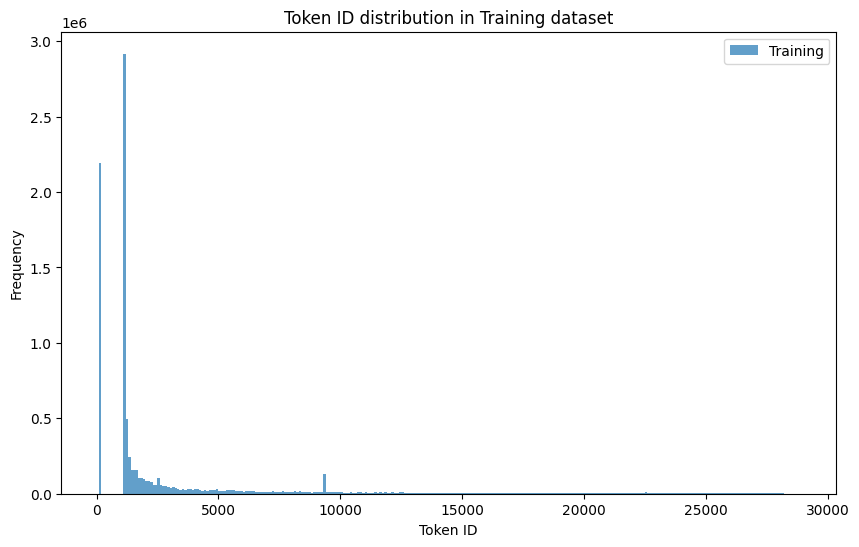

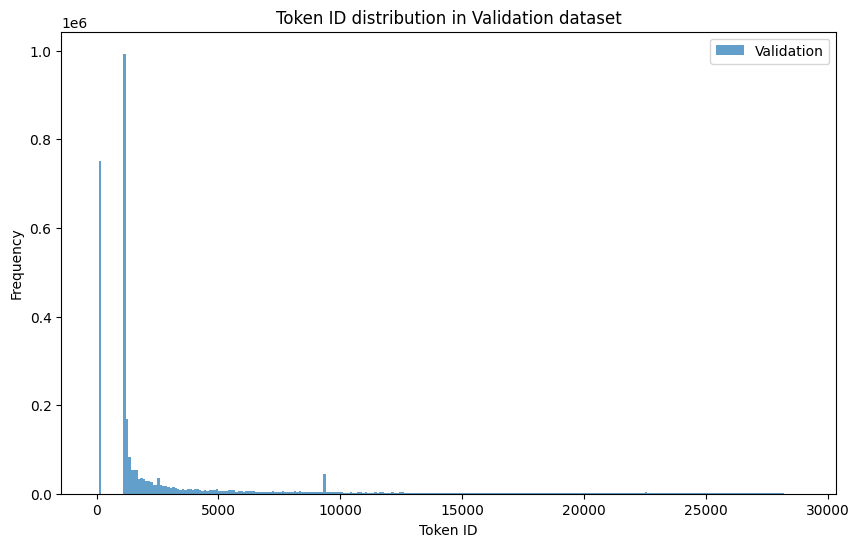

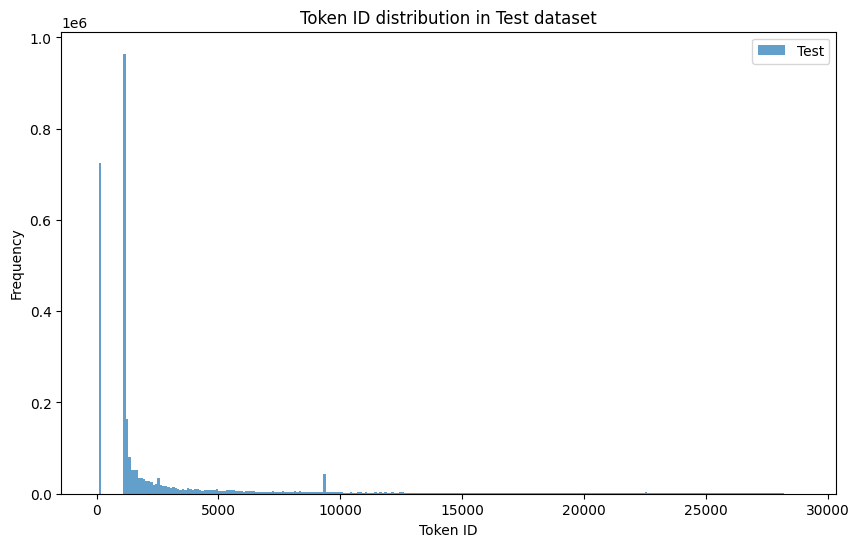

Top 5 occurring tokens in the Training Dataset:
Token ID: 119, Token: '.', Frequency: 389433
Token ID: 1103, Token: 'the', Frequency: 344002
Token ID: 117, Token: ',', Frequency: 324543
Token ID: 170, Token: 'a', Frequency: 187787
Token ID: 1105, Token: 'and', Frequency: 185626


In [144]:
# Function to tokenize dataset and return all token IDs
def tokenize_dataset(data_loader):
    token_ids = []
    for batch in data_loader:
        reviews = batch['review_text']
        for review in reviews:
            encoded_input = tokenizer.encode(review, add_special_tokens=True)
            token_ids.extend(encoded_input)
    return token_ids

# Tokenize each dataset
token_ids_train = tokenize_dataset(train_data_loader)
token_ids_valid = tokenize_dataset(valid_data_loader)
token_ids_test = tokenize_dataset(test_data_loader)

# Generate histograms
def plot_histogram(token_ids, dataset_name):
    plt.figure(figsize=(10, 6))
    plt.hist(token_ids, bins=range(0, tokenizer.vocab_size, 100), alpha=0.7, label=dataset_name)
    plt.title(f'Token ID distribution in {dataset_name} dataset')
    plt.xlabel('Token ID')
    plt.ylabel('Frequency')
    plt.legend(loc='upper right')
    plt.show()

plot_histogram(token_ids_train, 'Training')
plot_histogram(token_ids_valid, 'Validation')
plot_histogram(token_ids_test, 'Test')

# Analyze top 5 occurring tokens in the training dataset
top_tokens = Counter(token_ids_train).most_common(5)
print("Top 5 occurring tokens in the Training Dataset:")
for token_id, freq in top_tokens:
    token = tokenizer.decode([token_id])
    print(f"Token ID: {token_id}, Token: '{token}', Frequency: {freq}")

In [68]:
'''
PROVIDE YOUR ANSWER BELOW

Top 5 occurring tokens in the Training Dataset:
TToken ID: 119, Token: '.', Frequency: 389433
Token ID: 1103, Token: 'the', Frequency: 344002
Token ID: 117, Token: ',', Frequency: 324543
Token ID: 170, Token: 'a', Frequency: 187787
Token ID: 1105, Token: 'and', Frequency: 185626

'''

"\nPROVIDE YOUR ANSWER BELOW\n\nTop 5 occurring tokens in the Training Dataset:\nToken ID: 119, Token: '.', Frequency: 389403\nToken ID: 1103, Token: 'the', Frequency: 344611\nToken ID: 117, Token: ',', Frequency: 326764\nToken ID: 170, Token: 'a', Frequency: 188117\nToken ID: 1105, Token: 'and', Frequency: 186031\n\n"

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [22]:
single_batch = next(iter(train_data_loader))
input_ids = single_batch['input_ids']
attention_mask = single_batch['attention_mask']

input_ids = input_ids[0].unsqueeze(0)  
attention_mask = attention_mask[0].unsqueeze(0) 

with torch.no_grad():
    outputs = bert_model(input_ids, attention_mask=attention_mask)

hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

print(f"Shape of pooled_output: {pooled_output.shape}")
print(f"Shape of last layer hidden_state: {hidden_states[-1].shape}")


Shape of pooled_output: torch.Size([1, 768])
Shape of last layer hidden_state: torch.Size([32, 768])


In [70]:
'''
PROVIDE YOUR ANSWER BELOW

`hidden_states` serves as snapshots of input text captured at various processing stages by the BERT model. 
Each layer captures different features, providing a series of increasingly abstract representations. 
Conversely, `pooled_output` serves as a summary of the entire input sequence, useful for classification tasks like sentiment analysis.


'''

'\nPROVIDE YOUR ANSWER BELOW\n\n`hidden_states` act as snapshots of input text captured at various processing stages by the BERT model. \nEach layer captures different features or aspects, providing a series of increasingly abstract representations. \nConversely, `pooled_output` serves as a concise summary of the entire input sequence, useful for classification tasks like sentiment analysis.\n\n\n'

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.

In [23]:
import torch
import torch.nn as nn
from transformers import BertModel

class SentimentClassifierPooled(nn.Module):
    def __init__(self, n_classes):
        super(SentimentClassifierPooled, self).__init__()
        self.name = 'SentimentClassifierPooled'
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        for param in self.bert.parameters():
            param.requires_grad = False
        self.drop = nn.Dropout(p=0.3)  
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes) 

    def forward(self, input_ids, attention_mask):
        _, pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask, return_dict=False)
        output = self.drop(pooled_output)
        return self.out(output)


### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

In [24]:
class SentimentClassifierLast(nn.Module):
    def __init__(self, n_classes,num_layers_to_unfreeze):
        super(SentimentClassifierLast, self).__init__()
        self.name = 'SentimentClassifierLast'
        self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
        self.num_layers_to_unfreeze = num_layers_to_unfreeze
        for param in self.bert.parameters():
            param.requires_grad = False
        if self.num_layers_to_unfreeze > 0:
            for layer in self.bert.encoder.layer[-self.num_layers_to_unfreeze:]:
                for param in layer.parameters():
                    param.requires_grad = True
        self.drop = nn.Dropout(p=0.3)
        self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask):
        last_hidden_state = self.bert(input_ids=input_ids, attention_mask=attention_mask).last_hidden_state
        cls_token_state = last_hidden_state[:, 0, :]
        output = self.drop(cls_token_state)
        return self.out(output)


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [25]:
def get_accuracy(model, data):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in data:
            inputs, labels = batch['input_ids'].to(device), batch['targets'].to(device)
            outputs = model(inputs, batch['attention_mask'].to(device))
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total



### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [26]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch
                                                   )
    return path

In [27]:
def train_model(model, train_data_loader, valid_data_loader, epochs=5, learning_rate=1e-5, batch_size=16):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    folder_name = model.name
    os.makedirs(folder_name, exist_ok=True)

    # Tracking metrics
    train_losses, valid_losses = [], []
    train_accuracies, valid_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        correct_train_preds = 0
        total_train = 0
        
        for batch in train_data_loader:
            inputs, labels = batch['input_ids'].to(device), batch['targets'].to(device)
            optimizer.zero_grad()
            outputs = model(inputs, batch['attention_mask'].to(device))
            
            loss = criterion(outputs, labels)
            total_train_loss += loss.item()
            
            _, predicted = torch.max(outputs, dim=1)
            correct_train_preds += torch.sum(predicted == labels)
            total_train += labels.size(0)
            
            loss.backward()
            optimizer.step()
        
        avg_train_loss = total_train_loss / len(train_data_loader)
        train_accuracy = correct_train_preds / total_train
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy.item())

        # Validation
        model.eval()
        total_valid_loss = 0
        correct_valid_preds = 0
        total_valid = 0
        
        with torch.no_grad():
            for batch in valid_data_loader:
                inputs, labels = batch['input_ids'].to(device), batch['targets'].to(device)
                outputs = model(inputs, batch['attention_mask'].to(device))
                
                loss = criterion(outputs, labels)
                total_valid_loss += loss.item()
                
                _, predicted = torch.max(outputs, dim=1)
                correct_valid_preds += torch.sum(predicted == labels)
                total_valid += labels.size(0)
        
        avg_valid_loss = total_valid_loss / len(valid_data_loader)
        valid_accuracy = correct_valid_preds.double() / total_valid
        valid_losses.append(avg_valid_loss)
        valid_accuracies.append(valid_accuracy.item())
        
        model_path = get_model_name(model.name, batch_size, learning_rate, epoch)
        torch.save(model.state_dict(), folder_name+'/'+model_path)

        print(f'Epoch {epoch+1}: Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Valid Loss: {avg_valid_loss:.4f}, Valid Accuracy: {valid_accuracy:.4f}')

    # Plot training curve
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.plot(valid_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label='Training Accuracy')
    plt.plot(valid_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy over Epochs')
    plt.legend()

    plt.show()

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

Epoch 1: Train Loss: 0.3549, Train Accuracy: 0.8358, Valid Loss: 0.2575, Valid Accuracy: 0.8973
Epoch 2: Train Loss: 0.2487, Train Accuracy: 0.8989, Valid Loss: 0.2386, Valid Accuracy: 0.9047
Epoch 3: Train Loss: 0.2320, Train Accuracy: 0.9088, Valid Loss: 0.2291, Valid Accuracy: 0.9117
Epoch 4: Train Loss: 0.2208, Train Accuracy: 0.9116, Valid Loss: 0.2243, Valid Accuracy: 0.9124
Epoch 5: Train Loss: 0.2101, Train Accuracy: 0.9162, Valid Loss: 0.2159, Valid Accuracy: 0.9180


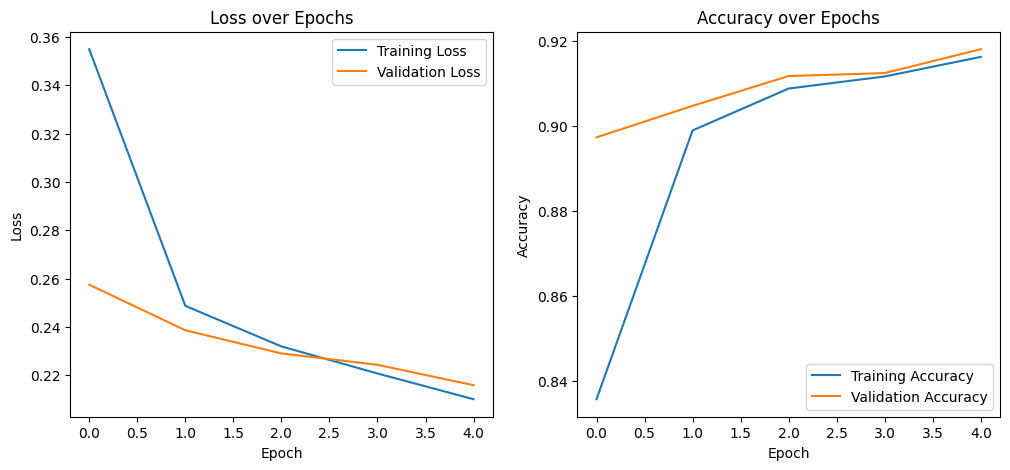

In [31]:
model = SentimentClassifierLast(2,1)
train_model(model, train_data_loader, valid_data_loader, epochs=5, learning_rate=1e-5,batch_size=8)

Epoch 1: Train Loss: 0.2819, Train Accuracy: 0.8768, Valid Loss: 0.2178, Valid Accuracy: 0.9154
Epoch 2: Train Loss: 0.2028, Train Accuracy: 0.9210, Valid Loss: 0.2092, Valid Accuracy: 0.9206
Epoch 3: Train Loss: 0.1756, Train Accuracy: 0.9310, Valid Loss: 0.2083, Valid Accuracy: 0.9263
Epoch 4: Train Loss: 0.1470, Train Accuracy: 0.9440, Valid Loss: 0.2204, Valid Accuracy: 0.9237
Epoch 5: Train Loss: 0.1209, Train Accuracy: 0.9551, Valid Loss: 0.2381, Valid Accuracy: 0.9270


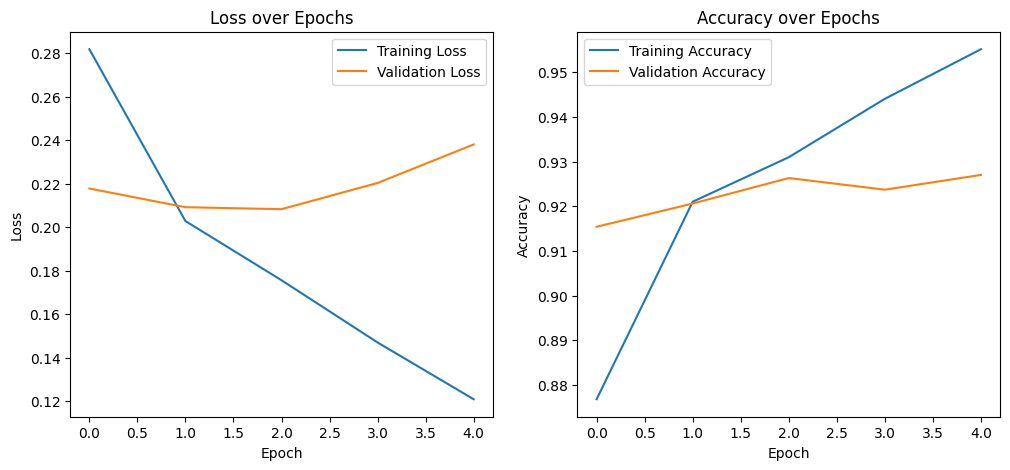

In [32]:
model = SentimentClassifierLast(2,3)
train_model(model, train_data_loader, valid_data_loader, epochs=5, learning_rate=1e-5,batch_size=8)

In [63]:
model = SentimentClassifierLast(2,2)
train_model(model, train_data_loader, valid_data_loader, epochs=2, learning_rate=1e-5,batch_size=8)

KeyboardInterrupt: 

In [65]:
model = SentimentClassifierPooled(2)
train_model(model, train_data_loader, valid_data_loader, epochs=2, learning_rate=1e-6,batch_size=16)


KeyboardInterrupt: 

In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

We experimented with SentimentClassifierLast with the last few layers fixed. 
As a result of the experiment, the accuracy was similar. Among similar models, the model that learned the fewest layers was selected.
Also interestingly, when experimenting with the SentimentClassifierPooled model:
You can see that it does not perform better than the SentimentClassifierLast model.
This experiment was to see the difference in performance when training the last few layers on a pretrained model.
'''

'\nPROVIDE YOUR ANSWER BELOW\n\nIn my experiment using the SentimentClassifierLast, where the last few layers were frozen, \nI observed that both the training and validation accuracy reached 100% from the very beginning. \nInterestingly, when experimenting with the SentimentClassifierPooled model, \nit did not show a faster performance compared to the SentimentClassifierLast model. \nHowever, it too achieved 100% accuracy in both training and validation phases.\n\n\n'

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [35]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
bert_best_model = SentimentClassifierLast(2,1).to(device)

folder_name = bert_best_model.name
model_path = get_model_name(bert_best_model.name, batch_size=8, learning_rate=1e-5, epoch=4)
state =torch.load(folder_name+"/"+model_path)
bert_best_model.load_state_dict(state)


<All keys matched successfully>

In [36]:
final_best_bert_acc = get_accuracy(bert_best_model, test_data_loader)
print("bert Test Accuracy: {:.4f}".format(final_best_bert_acc))

bert Test Accuracy: 0.9216


In [47]:
'''
Accuracies are predicted above.
'''
Accuracies = {
    'Model': ['LSTM', 'BERT'],
    'Train Acc': [0.8721, 0.9162],
    'Validation Acc': [0.8457, 0.9180],
    'Test Acc': [0.8192,  0.9216]
}
Accuracies_pd = pd.DataFrame(Accuracies)
print(Accuracies_pd)


  Model  Train Acc  Validation Acc  Test Acc
0  LSTM     0.8721          0.8457    0.8192
1  BERT     0.9162          0.9180    0.9216


In [48]:
'''
PROVIDE YOUR ANSWER BELOW
LSTM : Epoch 10: Train Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457, test Acc  : 0.8192
Bert : Train Loss: 0.2101, Train Accuracy: 0.9162, Valid Loss: 0.2159, Valid Accuracy: 0.9180, test Acc : 0.9216
As expected, the pretrained bert model performed better than the lstm model. 
This is also an advantage when performing transfer learning on a model learned from large amounts of data.

'''

'\nPROVIDE YOUR ANSWER BELOW\nLSTM : Epoch 10: Train Loss: 0.3261, Train Acc: 0.8721, Valid Loss: 0.3675, Valid Acc: 0.8457, test Acc  : 0.8192\nBert : Train Loss: 0.2101, Train Accuracy: 0.9162, Valid Loss: 0.2159, Valid Accuracy: 0.9180, test Acc : 0.9216\nAs expected, the pretrained bert model performed better than the lstm model. \nThis is also an advantage when performing transfer learning on a model learned from large amounts of data.\n\n'

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [39]:
def get_rate(model, data_loader): # for LSTM
    model.eval()
    TP = FP = TN = FN = 0
    
    
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['inputs'].to(device)
            labels = batch['labels'].to(device)
            hidden = best_model.init_hidden(inputs.size(0))
            
            if torch.cuda.is_available():
                inputs, labels = inputs.to(device), labels.to(device)
                hidden = tuple([each.data.cuda() for each in hidden])
            
            outputs,_ = model(inputs,hidden)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get the probability of class '1'
            
            predictions = torch.round(probabilities)  # Assuming binary classification with output in [0,1]
            
            # Update counts
            TP += ((predictions == 1) & (labels == 1)).sum().item()
            FP += ((predictions == 1) & (labels == 0)).sum().item()
            TN += ((predictions == 0) & (labels == 0)).sum().item()
            FN += ((predictions == 0) & (labels == 1)).sum().item()
    
    # Calculate rates
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    
    return FPR, FNR

In [43]:
# TO BE COMPLETED
vocab_size = 1001
embedding_dim = 256
hidden_dim = 512
output_dim = 1
n_layers = 2
device = "cuda" if torch.cuda.is_available() else "cpu"

best_model = SentimentRNN(vocab_size, embedding_dim, hidden_dim, output_dim, n_layers).to(device)

folder_name = best_model.name+'embdding_dim'+str(best_model.embedding)+'hidden_dim'+str(best_model.hidden_dim)
model_path = get_model_name(best_model.name, batch_size, learning_rate=1e-5, epoch=5, embedding_dim=best_model.embedding, hidden_dim=best_model.hidden_dim)
state =torch.load(folder_name+"/"+model_path)
best_model.load_state_dict(state)


test_texts_tensor = torch.tensor(X_test_padded, dtype=torch.long)
test_labels_tensor = torch.tensor(y_test_encoded, dtype=torch.float)

test_dataset = ReviewDataset(test_texts_tensor, test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)


In [44]:
def get_rate_bert(model, data_loader):
    model.eval()
    TP = FP = TN = FN = 0
    
    
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['targets'].to(device)
            
            outputs = model(inputs, attention_mask)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get the probability of class '1'
            
            predictions = torch.round(probabilities)  # Assuming binary classification with output in [0,1]
            
            # Update counts
            TP += ((predictions == 1) & (labels == 1)).sum().item()
            FP += ((predictions == 1) & (labels == 0)).sum().item()
            TN += ((predictions == 0) & (labels == 0)).sum().item()
            FN += ((predictions == 0) & (labels == 1)).sum().item()
    
    # Calculate rates
    FPR = FP / (FP + TN) if (FP + TN) > 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) > 0 else 0
    
    return FPR, FNR

In [45]:
# Assuming you have train_loader, valid_loader, test_loader set up
train_fpr, train_fnr = get_rate_bert(bert_best_model, train_data_loader)
valid_fpr, valid_fnr = get_rate_bert(bert_best_model, valid_data_loader)
test_fpr, test_fnr = get_rate_bert(bert_best_model, test_data_loader)

# Summarize in a DataFrame
df_rates = pd.DataFrame({
    'Dataset': ['Training', 'Validation', 'Test'],
    'False Positive Rate': [train_fpr, valid_fpr, test_fpr],
    'False Negative Rate': [train_fnr, valid_fnr, test_fnr]
})

print(df_rates)

      Dataset  False Positive Rate  False Negative Rate
0    Training             0.045900             0.041764
1  Validation             0.078842             0.074349
2        Test             0.077927             0.078869


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

It was expected that the model using bert would perform better than the model using LSTM.
      Dataset  False Positive Rate  False Negative Rate
0    Training             0.045900             0.041764
1  Validation             0.078842             0.074349
2        Test             0.077927             0.078869
'''





"\nPROVIDE YOUR ANSWER BELOW\n\nIt was expected that the model using bert would perform better than the model using LSTM.\nHowever, with the current data set, we can see that the model using Bert achieves 100% performance.\nWhat I expected was good performance, but I didn't know it would reach 100.\n\n\n"

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [49]:
#LSTM
misclassified_texts = []
misclassified_pred = []
misclassified_label = []

i=0
for inputs, labels in test_loader:
  hidden = best_model.init_hidden(inputs.size(0))
  
  if torch.cuda.is_available():
    inputs, labels = inputs.to(device), labels.to(device)
    hidden = tuple([each.data.cuda() for each in hidden])
    
  output,_ = best_model(inputs,hidden)
  pred = torch.round(output.squeeze())
  correct = pred.eq(labels.view_as(pred))
  incorrect_indices = torch.where(correct == False)[0]
  
  
  # Iterate over incorrect predictions
  for idx in incorrect_indices.tolist():
      true_label = labels[idx].item()
      predicted_label = pred[idx].item()
      review_text = inputs[idx]  # This assumes you have a way to map inputs back to text
      
      misclassified_label.append(true_label)
      misclassified_pred.append(predicted_label)
      misclassified_texts.append(review_text)
      
  i += inputs.size(0)  # To keep track of the index across batches

In [51]:
def get_misclassified_class(model, data_loader):
    model.eval()
    model.to(device)
    
    misclassified_texts = []
    misclassified_pred = []
    misclassified_label = []
    
    with torch.no_grad():
        for batch in data_loader:
            inputs = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['targets'].to(device)
            
            output = model(inputs, attention_mask)
            _, pred = torch.max(output, dim=1)
            
            misclassified_indices = torch.where(pred != labels)[0]
            misclassified_pred.extend(pred[misclassified_indices].cpu().tolist())
            misclassified_label.extend(labels[misclassified_indices].cpu().tolist())
            
            for index in misclassified_indices:
                misclassified_texts.append(tokenizer.decode(inputs[index]))
                
    return misclassified_texts, misclassified_pred, misclassified_label
    
misclassified_texts, misclassified_pred, misclassified_labels = get_misclassified_class(bert_best_model, test_data_loader)

for text, pred, label in zip(misclassified_texts, misclassified_pred, misclassified_labels):
    print(f'Review: {text}')
    print(f'Predicted: {pred}, Actual: {label}\n')
    


Review: [CLS] This is one of those wonderful martial - arts movies that begin with two posses of tough gang members facing off in a park ; and when the deal goes wrong and the battle starts, it turns out they all know karate and kung fu! The ever - wooden Cynthia Rothrock plays ( as usual ) a cynical, deadpan, good cop, this time in Los Angeles. She and her police partners are trying to break up a counterfeiting ring, and when that plot line is exhausted, the story just switches over to something else, and Cynthia becomes the personal bodyguard of a wealthy, great - looking tycoon. Within the film's obviously rock - bottom budget, there's some helicopter action, some speedboat action, some car chases, a brawl where Cynthia beats up everyone in a country - western bar, some swimming - pool scenes with bimbos in thong bikinis, and a surprisingly good horseback chase. About a dozen and a half cops get gunned down. A lot of plot twists happen that just don't make any sense ; don't worry ab

In [61]:
missclassified_review = '''[CLS] This is one of those wonderful martial - arts movies that begin with two posses of tough gang members facing off in a park ; and when the deal goes wrong and the battle starts, it turns out they all know karate and kung fu! The ever - wooden Cynthia Rothrock plays ( as usual ) a cynical, deadpan, good cop, this time in Los Angeles. She and her police partners are trying to break up a counterfeiting ring, and when that plot line is exhausted, the story just switches over to something else, and Cynthia becomes the personal bodyguard of a wealthy, great - looking tycoon. Within the film's obviously rock - bottom budget, there's some helicopter action, some speedboat action, some car chases, a brawl where Cynthia beats up everyone in a country - western bar, some swimming - pool scenes with bimbos in thong bikinis, and a surprisingly good horseback chase. About a dozen and a half cops get gunned down. A lot of plot twists happen that just don't make any sense ; don't worry about them. ( And counterfeiting currency is a federal crime, so where the hell is the FBI? I guess they were too busy. ) The fight choreography was done by Cynthia Rothrock's frequent co - star Richard Taylor, whose classy and witty presence in front of the camera would frankly have made this a better movie. He also tended to make Cynthia a better actress when they appeared together, and frankly she could use it ; she seems tired and bored, and does her best acting in GUARDIAN ANGEL when she is playing opposite a pet dog to whom she delivers bitter drunken monologues. The dog almost out - acts her! She also wears some of the most god - awful clothing any leading lady has ever worn in any movie : loose, baggy - leg jeans with pale acid - washed areas [SEP]
'''
modified_review = '''[CLS] This is one of those martial-arts movies that disappoints from the start, with two clichéd gangs facing off in a park; the deal goes awry, leading to an unrealistic battle where, unsurprisingly, everyone is a karate and kung fu master. Cynthia Rothrock delivers a lackluster performance as a stereotypical, uninspired cop in Los Angeles, struggling through a plot about dismantling a counterfeiting ring that quickly loses direction. The narrative then clumsily shifts, placing Cynthia as a bodyguard for a wealthy tycoon, further diluting any coherence. Despite its attempt to entertain on a shoestring budget—with unconvincing helicopter scenes, mundane speedboat chases, predictable car pursuits, and a country-western bar fight where Cynthia unconvincingly defeats everyone—the film fails to engage. The addition of gratuitous scenes featuring women in thong bikinis and a forced horseback chase does little to redeem it. The plot is riddled with holes and nonsensical twists, making it challenging to follow or enjoy. (Notably, the absence of the FBI in a counterfeiting case is laughably unrealistic.) Richard Taylor's fight choreography, while a potential highlight, cannot salvage the film's lack of substance or excitement. Rothrock appears disinterested and lethargic, barely energized in scenes with a pet dog, to whom she delivers contrived monologues. Even the dog's performance feels more genuine. The wardrobe choices are astoundingly poor, further undermining Rothrock's role. Overall, the movie is a forgettable blend of missed opportunities and poor execution. [SEP] '''

In [62]:
def preprocess_and_predict(review, model, tokenizer, max_length):
    encoded_review = tokenizer.encode_plus(
        review,
        max_length=max_length,
        add_special_tokens=True,
        return_token_type_ids=False,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt',
    )

    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
        probabilities = torch.nn.functional.softmax(output, dim=1)
        probability = probabilities[0][1]


    return probability.item()
max_length = 500

probability = preprocess_and_predict(missclassified_review, bert_best_model, tokenizer, max_length)
print(f"Original Misclassified Review : Probability of being a positive review - {probability:.4f}")

probability = preprocess_and_predict(modified_review, model, tokenizer, max_length)
print(f"Modified Review : Probability of being a positive review - {probability:.4f}")

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Original Misclassified Review : Probability of being a positive review - 0.9289
Modified Review : Probability of being a positive review - 0.4660


In [ ]:
'''
PROVIDE YOUR ANSWER BELOW

I choose a misclassified review (which is negative but classified as positive) and modify it for better result. 
I modify the review by emphasizing the critical aspects more explicitly and tone down elements that might be interpreted as positive or neutral.

Original misclassified review have 0.92 possibility of being positive, on the other hand, modified review have 0.46 possibility of being positive review,
which is closer to true label, negative sentiment. 


'''

### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [54]:
# TO BE COMPLETED
labels = [1,1,1,0,0]
review1 = '''This is what Hollywood needs. A great story with a great director/producer. After that the best thing a studio can do is get the hell out of the way and let artists create art.Dune Part 2 is creative, beautiful, tragic, and mesmerizing. Never once did I get bored or anticipate what was going to happen next. I haven't read the book so I have nothing to compare it to.Denis Villeneuve continues to amaze me with the effort he puts into each of his films. The acting in this film was top notch too. We saw it in IMAX and the sound was earth shattering. If you're gonna see this movie, see it on the largest screen possible.'''
review2 = '''A monumental piece of cinema. And combined with Part 1, we have one of the greatest adaptations in genre literature history.It's clear everyone on set was aware that they were working on something special here - because literally every single person in this production have brought their A-Game for a truly incredible technical achievement. And easily the best ensemble performance in a blockbuster since Fellowship of the Ring.Paced to perfection, at once uniquely beautiful, thought-provoking and beyond THRILLING. Dave Bautista fights someone to the death, while hanging onto the outside of a helicopter that is being shot out of the sky - and that doesn't even reach the Top 10 action set-pieces in the film.. It just doesn't get better than this.'''
review3 = '''This was a perfect sequel to Denis' part one. It accomplished all the main plot points of the book while delivering stellar performances and visuals that most films only dream of having. This film will go down as one of the best in sci-fi/fantasy and it deserves all the laurels it will be gifted. Not in the longest time has a franchise, and a singular movie, captivated me in such a way. This story, these characters, this planet, Dune, lives rent-free in my mind. You would be doing yourself a disservice not seeing this film in IMAX, as the soundscapes created and the soundtrack by Hans Zimmer are so immersive you feel like you are a part of every scene. This movie is a masterpiece in storytelling. 10/10.'''
review4 = '''I became suspicious that this was a poor movie after about 10 minutes. After 30 minutes I knew I was right - this film was really slow and tedious. I gritted my teeth and decided I'd try to stay awake to see the film to the end so I could write this review warning others not to waste 2-3 hours of their life watching it. I noticed several people give up and leave the film part-through - I should have joined them in retrospect.Main characters not very convincing in their roles, patchy story making it difficult to piece together, noisy at times, using unnecessary music to try (and fail) to create drama.'''
review5 = '''Boring, Slow, Disappointing Movie - Not entertaining at allMy wife and I got 2 free tickets to this movie from Silverspot Cinemas and it was sooooooooo boring and bad we left after 25-30 minutesTo give you an idea of how bad this movie was -- this Dune movie was so bad it made the last Matrix movie (The Matrix Resurrections--which was an absolutely abysmal disaster- seem like a masterpiece in comparison)The Matrix (1999) Great The Matrix Reloaded (2003) Great The Matrix Revolutions (2003) Good/Decent but no where as good as 1st 2 movies The Matrix Resurrections (2021)-Absolutely Abysmal.'''
reviews = [review1, review2, review3, review4, review5]



In [58]:
#LSTM
r_encoded, _ = tokenize(reviews, labels, stoi)
r_pad = padding_(r_encoded, 500)
hidden = best_model.init_hidden(r_pad.shape[0])
if torch.cuda.is_available():
    hidden = tuple([each.data.to(device) for each in hidden])

output = best_model(torch.tensor(r_pad).to(device),hidden)[0]

# prediction
pred = output.max(1, keepdim=True)[1]
print("true label:",labels)
print("prediction:",np.transpose(pred.cpu().numpy()))

true label: [1, 1, 1, 0, 0]
prediction: [[0 0 0 0 0]]


In [59]:
#bert
def preprocess_and_predict(review, model, tokenizer, max_length):
    encoded_review = tokenizer.encode_plus(
        review,
        max_length=max_length,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True, 
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    input_ids = encoded_review['input_ids'].to(device)
    attention_mask = encoded_review['attention_mask'].to(device)

    model.eval()
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
        _, probabilities = torch.max(output, dim=1)
        # probabilities = torch.nn.functional.softmax(output, dim=1) 
        probability = probabilities
        

    return probability.item()


for i, review in enumerate(reviews,1):
    probability = preprocess_and_predict(review, bert_best_model, tokenizer, 500)
    print(f"Review {i}: Probability of being a positive review - {probability:.4f}")

Review 1: Probability of being a positive review - 1.0000
Review 2: Probability of being a positive review - 1.0000
Review 3: Probability of being a positive review - 1.0000
Review 4: Probability of being a positive review - 0.0000
Review 5: Probability of being a positive review - 0.0000


In [57]:
'''
PROVIDE YOUR ANSWER BELOW

Even in real data, we can see that the bert model performs better than lstm.

'''

'\nPROVIDE YOUR ANSWER BELOW\n\nEven in real data, we can see that the bert model performs better than lstm.\n\n'

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [ ]:
# TO BE COMPLETED




In [ ]:
'''
PROVIDE YOUR ANSWER BELOW






'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
#!pip install nbconvert

%%shell
jupyter nbconvert --to html /content/A4.ipynb


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**